# Machine Learning Project

### Load the data into a dataframe

In [238]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

data = pd.read_csv("Train.csv")
data.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,...,7,4,1230,17,19,1265,1230,17,0.0,0
1,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,...,0,0,0,0,0,0,0,0,0.0,0
2,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
3,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0
4,B0_2064,18,7,UTF-8,nginx,NaN,SC,Mahe,3/08/2016 14:30,3/10/2016 3:45,...,6,9,894,11,13,838,894,11,0.0,0


In [249]:
from sklearn.preprocessing import OneHotEncoder
def transform(data, column_name):
    # so that the WHOIS_COUNTRY column is the same each run
    data[column_name] = pd.read_csv("Train.csv")[column_name]

    data[column_name] = data[column_name].apply(lambda x: x.upper())
    data[column_name] = data[column_name].str.replace('UNITED KINGDOM', 'UK', case= False) 
    data[column_name] = data[column_name].fillna("NONE")
    X= data[column_name]
    index  = 0
    array = []
    for name in list(X.value_counts().index):
        array.append([name, index])
        index += 1

    COUNTRY_enc = OneHotEncoder(drop='first').fit(array)

    country_dictionary = {}
    cats = COUNTRY_enc.categories_[0]
    indices = COUNTRY_enc.categories_[1]
    for cat, index in zip(cats, indices):
        country_dictionary[cat] = index


    countries = [[country, country_dictionary[country]] for country in list(data[column_name].fillna("NONE"))]
    data[column_name] = [x[1] for x in countries]


## Transform the categorical features

### Transform CHARSET

In [250]:
# so that the WHOIS_COUNTRY column is the same each run
data["CHARSET"] = pd.read_csv("Train.csv")["CHARSET"]
transform(data, "CHARSET")

### Transform URL

In [251]:
# so that the WHOIS_COUNTRY column is the same each run
data["URL"] = pd.read_csv("Train.csv")["URL"]
transform(data, "URL")

### Transform WHOIS_STATEPRO

In [252]:
# so that the WHOIS_STATEPRO column is the same each run
data["WHOIS_STATEPRO"] = pd.read_csv("Train.csv")["WHOIS_STATEPRO"]
transform(data, "WHOIS_STATEPRO")

### Transform SERVER

In [253]:
# so that the WHOIS_COUNTRY column is the same each run
data["SERVER"] = pd.read_csv("Train.csv")["SERVER"]
transform(data, "SERVER")
#TODO need to convert float values to string

AttributeError: 'float' object has no attribute 'upper'

### Transform WHOIS_COUNTRY

In [169]:
# so that the WHOIS_COUNTRY column is the same each run
data["WHOIS_COUNTRY"] = pd.read_csv("Train.csv")["WHOIS_COUNTRY"]
transform(data, "WHOIS_COUNTRY")

### Detect the features most correlated with type

In [176]:
data_transformed = data.drop(["WHOIS_REGDATE", "WHOIS_UPDATED_DATE"], axis=1)
#data_transformed = (data_transformed-data_transformed.mean())/data_transformed.std()
data_transformed.corr()["Type"]

URL                          0.544331
URL_LENGTH                   0.150140
NUMBER_SPECIAL_CHARACTERS    0.262379
CHARSET                      0.028940
SERVER                      -0.091686
CONTENT_LENGTH              -0.098117
WHOIS_COUNTRY               -0.223252
WHOIS_STATEPRO               0.012171
TCP_CONVERSATION_EXCHANGE   -0.048396
DIST_REMOTE_TCP_PORT        -0.077496
REMOTE_IPS                  -0.067438
APP_BYTES                   -0.011302
SOURCE_APP_PACKETS          -0.040544
REMOTE_APP_PACKETS          -0.037299
SOURCE_APP_BYTES            -0.058839
REMOTE_APP_BYTES            -0.011090
APP_PACKETS                 -0.040544
DNS_QUERY_TIMES              0.062952
Type                         1.000000
Name: Type, dtype: float64

#### The most correlated ones are: 
- "URL"
- "URL_LENGTH"
- "NUMBER_SPECIAL_CHARACTERS"
- "WHOIS_COUNTRY"

<AxesSubplot:>

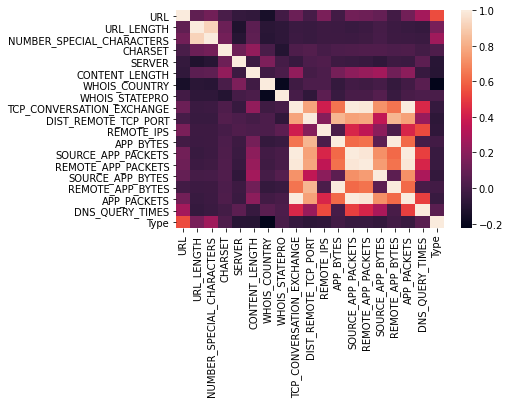

In [235]:
sns.heatmap(data.corr())

### Using PCA for data visualisation
##### In order to be able to create 2 dimensional plots, we use the principal component analysis reduction technique on the top 4 correlated features

Text(0.5, 1.0, 'PCA reduced data')

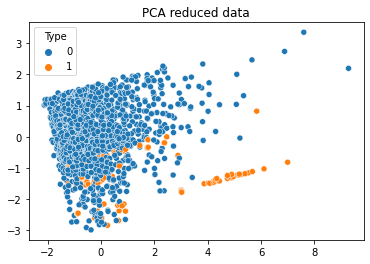

In [233]:
from sklearn.decomposition import PCA
from  seaborn import scatterplot

pca = PCA(n_components=2)
col=data[["URL", "URL_LENGTH", "NUMBER_SPECIAL_CHARACTERS", "WHOIS_COUNTRY"]]
col = (col-col.mean())/col.std()

sc= pca.fit_transform(col)
plt= scatterplot(x=[x[0] for x in sc],y=[x[1]for x in sc],hue=data["Type"])
plt.set_title('PCA reduced data')

### Detect NAs in the numerical features

In [146]:
print("NAs present in NUMBER_SPECIAL_CHARACTERS:", any(data["NUMBER_SPECIAL_CHARACTERS"].isna()))
print("NAs present in URL_LENGTH:", any(data["URL_LENGTH"].isna()))

NAs present in CONTENT_LENGTH: True
NAs present in NUMBER_SPECIAL_CHARACTERS: False
NAs present in URL_LENGTH: False
NAs present in DIST_REMOTE_TCP_PORT: False
NAs present in REMOTE_IPS: False


In [236]:
# take the highest correlated rows
X = data_transformed[["URL", "URL_LENGTH", "NUMBER_SPECIAL_CHARACTERS", "WHOIS_COUNTRY", "Type"]]

# take all rows with class 1
class_1 = X[X["Type"] == 1]

# get amount of class 1s
n_class_1 = len(class_1)

# randomly sample rows with Type 0 n_class_1 times
class_0 = X[X["Type"] == 0].sample(n=n_class_1, random_state=1)

# join the two into one final dataframe 
X = pd.concat([class_1, class_0])

# extract the class and features
Y = X["Type"]
X = X.drop(["Type"], axis=1)

# split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

LR = LogisticRegression().fit(X_train, y_train)
print("The accuracy on the test set is", accuracy_score(y_test, LR.predict(X_test)))

The accuracy on the test set is 1.0


### Only CONTENT_LENGTH needs to be cleaned
##### Linear regression is applied to missing values
- The rows could be omitted, however rows with missing "CONTENT_LENGTH" are often of "Type" 1, the lesser class and we therefore want to avoid dropping these

##### Another alternative is to replace these with 0 and see if the classifier is able to predict using this information

### Regress the values

In [147]:
# find the values most correlated with CONTENT_LENGTH for the regression
data.corr()["CONTENT_LENGTH"]

URL                         -0.061756
URL_LENGTH                   0.067569
NUMBER_SPECIAL_CHARACTERS    0.075240
CHARSET                      0.222859
SERVER                      -0.031947
CONTENT_LENGTH               1.000000
WHOIS_COUNTRY               -0.013513
WHOIS_STATEPRO               0.019319
TCP_CONVERSATION_EXCHANGE    0.225403
DIST_REMOTE_TCP_PORT        -0.001285
REMOTE_IPS                   0.021816
APP_BYTES                    0.140473
SOURCE_APP_PACKETS           0.207385
REMOTE_APP_PACKETS           0.239295
SOURCE_APP_BYTES             0.269330
REMOTE_APP_BYTES             0.128048
APP_PACKETS                  0.207385
DNS_QUERY_TIMES             -0.043746
Type                        -0.098117
Name: CONTENT_LENGTH, dtype: float64

In [149]:
# select CONTENT_LENGTH rows with non-missing values
non_na_rows = data[data["CONTENT_LENGTH"].notna()]

# select the highest correlated columns
reg_X = non_na_rows[["TCP_CONVERSATION_EXCHANGE", "REMOTE_APP_PACKETS", "SOURCE_APP_PACKETS", "SOURCE_APP_BYTES", "APP_PACKETS"]]
reg_y = non_na_rows["CONTENT_LENGTH"]

In [150]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression().fit(reg_X, reg_y)

### Predict missing values 

In [151]:
content_length_values = list(data["CONTENT_LENGTH"])
nas = list(data["CONTENT_LENGTH"].isna())
na_rows = data[data["CONTENT_LENGTH"].isna()][["TCP_CONVERSATION_EXCHANGE", "REMOTE_APP_PACKETS", "SOURCE_APP_PACKETS", "SOURCE_APP_BYTES", "APP_PACKETS"]]
predictions = regressor.predict(na_rows)


index = 0
for i in range(len(nas)):
    if nas[i]:
        content_length_values[i] = predictions[index]
        index += 1
data_copy = data.copy()
data_copy["CONTENT_LENGTH"] = content_length_values

### Replace with 0

In [152]:
X = data[["URL_LENGTH", "NUMBER_SPECIAL_CHARACTERS", "DIST_REMOTE_TCP_PORT", "REMOTE_IPS"]]
y = data["Type"]
X_cleaned = data_copy[["URL_LENGTH", "NUMBER_SPECIAL_CHARACTERS", "DIST_REMOTE_TCP_PORT", "REMOTE_IPS", "CONTENT_LENGTH"]]

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
LR = LogisticRegression().fit(X_train, y_train)
accuracy_score(y_test, LR.predict(X_test))

0.9023255813953488

In [108]:
# classification with the regressed CONTENT_LENGTH

X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y, test_size=0.3, random_state=42)
LR = LogisticRegression().fit(X_train, y_train)
accuracy_score(y_test, LR.predict(X_test))

/home/jakubhorvath/anaconda3/envs/LTR_annotator/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9

### The data has a class imbalance problem

In [5]:
print("Number of rows with class 0 is", len(data[data["Type"] == 0]))
print("Number of rows with class 1 is", len(data[data["Type"] == 1]))

Number of rows with class 0 is 1272
Number of rows with class 1 is 159


### Sample the same number of examples from class 1 and 0

In [109]:
# take all rows with class 1
class_1 = data[data["Type"] == 1]

# get amount of class 1s
n_class_1 = len(class_1)

# randomly sample rows with Type 0 n_class_1 times
class_0 = data[data["Type"] == 0].sample(n=n_class_1, random_state=1)

# join the two into one final dataframe 
X = pd.concat([class_1, class_0])

# extract the class and features
Y = X["Type"]
X = X.drop(["Type"], axis=1)

# split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [230]:


# match the country to a numerical value for the train and test set
country_train = [[country, country_dictionary[country]] for country in list(X_train["WHOIS_COUNTRY"].fillna("NONE"))]
country_test = [[country, country_dictionary[country]] for country in list(X_test["WHOIS_COUNTRY"].fillna("NONE"))]

# match the charset to a numerical value for the train and test set
charset_train = [[charset, charset_dictionary[charset]] for charset in list(X_train["CHARSET"].fillna("NONE"))]
charset_test = [[charset, charset_dictionary[charset]] for charset in list(X_test["CHARSET"].fillna("NONE"))]

# convert the train and test sets to a numpy array
X_train = X_train[["URL_LENGTH", "NUMBER_SPECIAL_CHARACTERS", "DIST_REMOTE_TCP_PORT", "REMOTE_IPS"]].to_numpy()
X_test = X_test[["URL_LENGTH", "NUMBER_SPECIAL_CHARACTERS", "DIST_REMOTE_TCP_PORT", "REMOTE_IPS"]].to_numpy()

# add the country values to the train and test set
country_ids = [x[1] for x in country_train]
X_train = [np.append(x,country) for x, country in zip(X_train, country_ids)]
country_ids = [x[1] for x in country_test]
X_test = [np.append(x,country) for x, country in zip(X_test, country_ids)]

# add the charset values to the train and test set
charset_ids = [x[1] for x in charset_train]
X_train = [np.append(x,charset) for x, charset in zip(X_train, charset_ids)]
charset_ids = [x[1] for x in charset_test]
X_test = [np.append(x,charset) for x, charset in zip(X_test, charset_ids)]

In [231]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC

# try fitting multiple models on this data
LR = LogisticRegression().fit(X_train, y_train)
RFC = RandomForestClassifier().fit(X_train, y_train)
LSVC = LinearSVC().fit(X_train, y_train)
SVC = SVC().fit(X_train, y_train)

/home/jakubhorvath/anaconda3/envs/LTR_annotator/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [232]:
# test the model's accuracy against the test set
print(accuracy_score(y_test, LR.predict(X_test)))
print(accuracy_score(y_test, RFC.predict(X_test)))
print(accuracy_score(y_test, LSVC.predict(X_test)))
print(accuracy_score(y_test, SVC.predict(X_test)))

0.8850174216027874
0.9303135888501742
0.37282229965156793
0.8641114982578397


### To fix the class imbalance problem we implemented SMOTE

In [233]:
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where
from collections import Counter

# convert the data into arrays for SMOTE
X = X_train + X_test
y_train = y_train.to_numpy() 
y_test = y_test.to_numpy()
y = np.append(y_train, y_test)

# creates the SMOTE objects, fits and oversamples them
oversample = SMOTE(random_state=42)
X, y = oversample.fit_resample(X, y)


"""
counter = Counter(y)
 

for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()"""

'\nfor label, _ in counter.items():\n\trow_ix = where(y == label)[0]\n\tpyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))\npyplot.legend()\npyplot.show()'

In [234]:
# Splits into train and test set and trains two models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
LR = LogisticRegression().fit(X_train, y_train)
RFC = RandomForestClassifier().fit(X_train, y_train)

In [235]:
# Test the accuracy on the SMOTE test set
accuracy_score(y_test, LR.predict(X_test))
accuracy_score(y_test, RFC.predict(X_test))

0.9727463312368972

In [236]:
class_1 = data_copy[data_copy["Type"] == 1]
n_class_1 = len(class_1)
class_0 = data_copy[data_copy["Type"] == 0].sample(n=n_class_1, random_state=1)

X = pd.concat([class_1, class_0])
Y = X["Type"]
X = X.drop(["Type"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
import numpy as np
from sklearn.preprocessing import normalize
country_train = [[country, country_dictionary[country]] for country in list(X_train["WHOIS_COUNTRY"].fillna("NONE"))]
country_test = [[country, country_dictionary[country]] for country in list(X_test["WHOIS_COUNTRY"].fillna("NONE"))]


charset_train = [[charset, charset_dictionary[charset]] for charset in list(X_train["CHARSET"].fillna("NONE"))]
charset_test = [[charset, charset_dictionary[charset]] for charset in list(X_test["CHARSET"].fillna("NONE"))]

#countries = COUNTRY_enc.transform(country).toarray()

X_train = X_train[["URL_LENGTH", "NUMBER_SPECIAL_CHARACTERS", "DIST_REMOTE_TCP_PORT", "REMOTE_IPS"]].to_numpy()
X_test = X_test[["URL_LENGTH", "NUMBER_SPECIAL_CHARACTERS", "DIST_REMOTE_TCP_PORT", "REMOTE_IPS"]].to_numpy()

#countries = COUNTRY_enc.transform(country).toarray()

country_ids = [x[1] for x in country_train]
X_train = [np.append(x,country) for x, country in zip(X_train, country_ids)]
country_ids = [x[1] for x in country_test]
X_test = [np.append(x,country) for x, country in zip(X_test, country_ids)]

charset_ids = [x[1] for x in charset_train]
X_train = [np.append(x,charset) for x, charset in zip(X_train, charset_ids)]
charset_ids = [x[1] for x in charset_test]
X_test = [np.append(x,charset) for x, charset in zip(X_test, charset_ids)]

#X_train = normalize(X_train, norm='l2')
#X_test = normalize(X_test, norm='l2')
#TODO append another column of one hot encoded features

In [237]:
# test the accuracy on the non-SMOTE test set
accuracy_score(np.append(y_train, y_test), RFC.predict(X_train + X_test))

0.9968553459119497

159